# Kids Hoppy Prediction 
 
### Group Member
- Zarah Shibli
- Lama Alzahrani
- Wajd Alturki

In [ ]:
import pandas as pd
import json
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
 
# Set the plot style to a seaborn theme
plt.style.use("seaborn")
sns.set_style('white')
sns.set_palette("rocket",4)

## Load data from kaggle 

Hobby prediction basic avilable [here](https://www.kaggle.com/abtabm/hobby-prediction-basic).

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
 
 
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
 
!chmod 600 ~/.kaggle/kaggle.json
 
!kaggle datasets download -d abtabm/hobby-prediction-basic

  0% 0.00/8.17k [00:00<?, ?B/s]
100% 8.17k/8.17k [00:00<00:00, 6.85MB/s]


## Extract all files from zip file

In [ ]:
with zipfile.ZipFile('/content/hobby-prediction-basic.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

## Read data

In [ ]:
df = pd.read_csv('/content/dataset/Hobby_Data.csv')

Let’s have a look at data



In [ ]:
#Show Number of Rows and Columns on the dataset
df.shape

(1601, 14)

from the output we have 1601 rows and 14 columns.



   `


## Data Overview

In [ ]:
df.head()
#Inspect the first five rows of the handwritten digits data

,Olympiad_Participation,Scholarship,School,Fav_sub,Projects,Grasp_pow,Time_sprt,Medals,Career_sprt,Act_sprt,Fant_arts,Won_arts,Time_art,Predicted Hobby
0,Yes,Yes,Yes,Mathematics,Yes,5,1,Yes,No,No,No,Maybe,3,Academics
1,Yes,Yes,Yes,Mathematics,Yes,3,2,No,No,No,No,No,1,Academics
2,Yes,Yes,Yes,Science,Yes,5,1,Yes,No,No,No,No,1,Academics
3,Yes,Yes,Yes,Mathematics,Yes,5,1,Yes,No,No,No,Maybe,3,Academics
4,Yes,Yes,Yes,Science,Yes,5,3,No,No,No,No,No,2,Academics


In [ ]:
df.tail()
#Inspect the last five rows of the handwritten digits data

,Olympiad_Participation,Scholarship,School,Fav_sub,Projects,Grasp_pow,Time_sprt,Medals,Career_sprt,Act_sprt,Fant_arts,Won_arts,Time_art,Predicted Hobby
1596,No,No,Yes,Science,No,3,1,Yes,Yes,Yes,No,No,2,Sports
1597,Yes,No,Yes,Any language,Yes,4,3,No,Yes,No,No,Yes,4,Sports
1598,Yes,No,Yes,Any language,No,3,3,No,Yes,No,No,Maybe,2,Sports
1599,Yes,Yes,Yes,Any language,No,4,3,Yes,Yes,No,Yes,Maybe,2,Sports
1600,Yes,No,No,Mathematics,Yes,3,2,No,Yes,No,Yes,No,1,Sports


##Get info about dataset






In [ ]:
df.info()
# to get some general information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Olympiad_Participation  1601 non-null   object
 1   Scholarship             1601 non-null   object
 2   School                  1601 non-null   object
 3   Fav_sub                 1601 non-null   object
 4   Projects                1601 non-null   object
 5   Grasp_pow               1601 non-null   int64 
 6   Time_sprt               1601 non-null   int64 
 7   Medals                  1601 non-null   object
 8   Career_sprt             1601 non-null   object
 9   Act_sprt                1601 non-null   object
 10  Fant_arts               1601 non-null   object
 11  Won_arts                1601 non-null   object
 12  Time_art                1601 non-null   int64 
 13  Predicted Hobby         1601 non-null   object
dtypes: int64(3), object(11)
memory usage: 175.2+ KB


##Description of the Data





In [ ]:
df.describe()
#to get some information on our data

,Grasp_pow,Time_sprt,Time_art
count,1601.000000,1601.000000,1601.000000
mean,3.480325,3.033729,2.234229
std,1.006737,1.347725,1.266186
min,1.000000,1.000000,1.000000
25%,3.000000,2.000000,1.000000
50%,3.000000,3.000000,2.000000
75%,4.000000,4.000000,3.000000
max,6.000000,6.000000,6.000000


In [ ]:
# Attribute Description:
 
 
# Olympiad_Participation:   Has your child participated in any Science/Maths Olympiad?
# Scholarship:  Has he/she received any scholarship?
# School:   Love's going to school?
# Fav_sub:  What is his/her favorite subject?
# Projects:     Has done any projects under academics before?
# Grasp_pow:    His/Her Grasping power (1-6)
# Time_sprt:    How much time does he/she spend playing outdoor/indoor games?
# Medals:   Medals won in Sports?
# Career_sprt:  Want's to pursue his/her career in sports?
# Act_sprt:     Regular in his/her sports activities?
# Fant_arts:    Love creating fantasy paintings?
# Won_arts:     Won art competitions?
# Time_art:     Time utilized in Arts?

##**Plotting**

###**Out of the 1601  kids recorded in this dataset how many of them have gotten a scholership?**

We discovered that the Number of kids who got a scholarship was the lowest as their percentage was 41.72%, where as the percentage of those who did not get a scholarship was 58.28%.

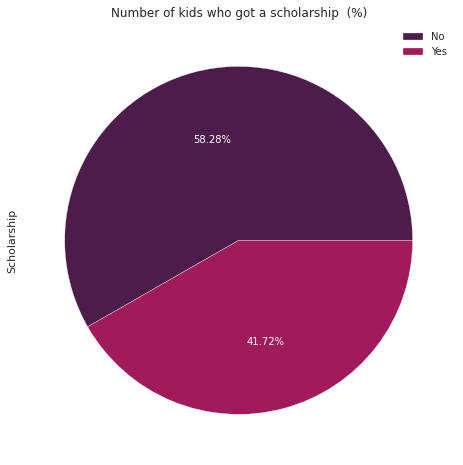

In [ ]:
plt.figure(figsize=(10,8))
 
df1=df["Scholarship"].value_counts(normalize=True).plot(kind="pie", legend=True, autopct='%.2f%%' , textprops={'color':"w"}, title="Number of kids who got a scholarship  (%)")

### **What are the the kids' grasp power level given their favourite subject? Could it be the higher their grasp power the more likely for them to win medals?**
 
We realized that kids who’s favorite subjects are Science or Mathematics have a medium to high grasp power and are more likely to win sport's medals. Kids who's grasp power is at a medium range are more likely to win medals,therefore showing that if you have good intellectual abilities it doesn't necessarily lessen your physical capabilities.

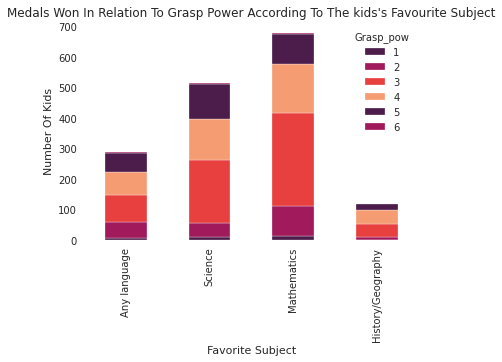

In [ ]:
 
 
df2 = df.groupby(["Fav_sub","Grasp_pow"])\
.count()["Medals"]\
.unstack("Grasp_pow")\
.reset_index()
 
 
df2["sum"] = df2.iloc[:,1:].apply(lambda x: sum(x), axis=1)
 
df2 = df2.sort_values("sum").set_index("Fav_sub")
 
df2.drop("sum", axis=1).plot(kind="bar", stacked=True, title="Medals Won In Relation To Grasp Power According To The kids's Favourite Subject",xlabel="Favorite Subject",ylabel="Number Of Kids")
plt.show();



###**Do kids who spend a great amount of time in art actually win art competitions?**
 
Found out that all the kids who spend a great amount of time in at (between 6 and 5) all have won art competions. Which visually represents that the more time kids spend practicing art the more likely the kids are able to excel in art and win art competitions.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 88.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


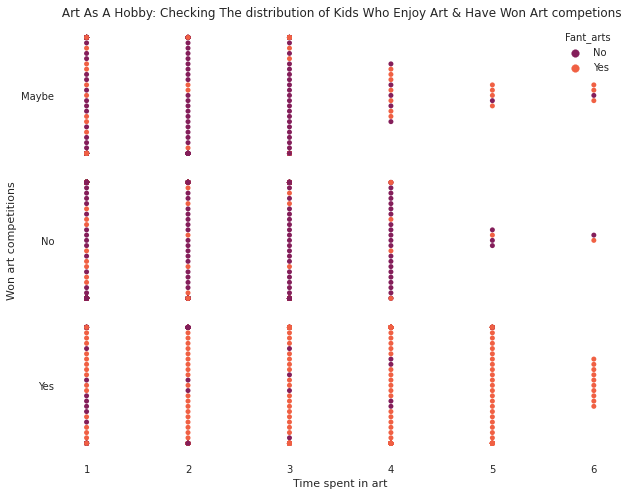

In [ ]:
plt.figure(figsize=(10,8))
 
sns.swarmplot(
    x="Time_art",
    y="Won_arts", 
    hue="Fant_arts", 
    data=df,
    palette='rocket'
)
plt.xlabel("Time spent in art") # add x label 
plt.ylabel("Won art competitions") # add y label 
plt.title(" Art As A Hobby: Checking The distribution of Kids Who Enjoy Art & Have Won Art competions");

### **Which hobby the kids who have high grasp power not predicted to interest on it?**


Through the dataset we conclude, the kids who have high grasp power are not predicted to be interested in Arts, they are interested in Academics or Sports.In addition, most kids who have a medium grasp power, which is around 3, are interested in Arts.

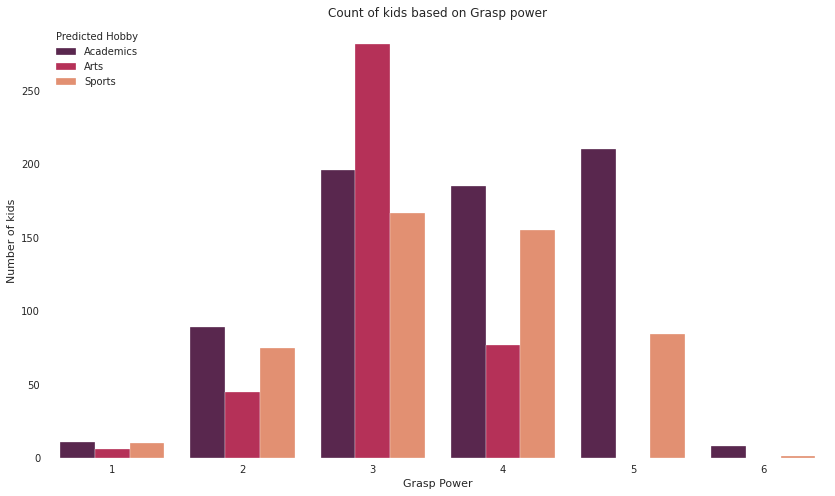

In [ ]:
# Count of the kids based on the grasp power and the Predicted Hobby
 
# create count plot 
fig, ax = plt.subplots(figsize=(14,8)) # create figure with figsize in inches
 
sns.countplot(data = df, x ='Grasp_pow', hue='Predicted Hobby', palette='rocket')
plt.xlabel("Grasp Power") # add x label 
plt.ylabel("Number of kids") # add y label 
plt.title("Count of kids based on Grasp power"); # add title

### **Do kids who regularly play sports are the most winning medals?**
 
### **What is the average time medal winning kids spend playing sports?**
 
 
As compare between the kids who wining medals and another desn't win. The kids who regularly play in sports activities are the most winning medals in the sport activities. And the kids who's unregularly in sport activities unlikely to winning medals. A three hours is the average time medal winning kids spend playing games.

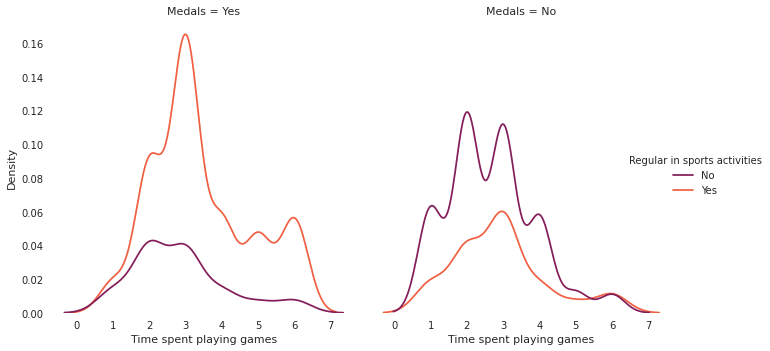

In [ ]:
# The relation between the time spent on playing games and won the medals for who is regular in sports activities or not
 
# create distribution plots
 
g = sns.displot(
  
    df, x="Time_sprt", col="Medals", hue='Act_sprt', palette='rocket',
    height=5, kind='kde', facet_kws=dict(margin_titles=True)
)
 
g.set_axis_labels("Time spent playing games") # change the x lables 
g.legend.set_title("Regular in sports activities") # change the legned



   -

### **Out of the kids in dataset how many of them have done any project before?**





We found that 57.8% of kids had completed projects under acadmices before, and 42.2% of them had not completed any project yet.





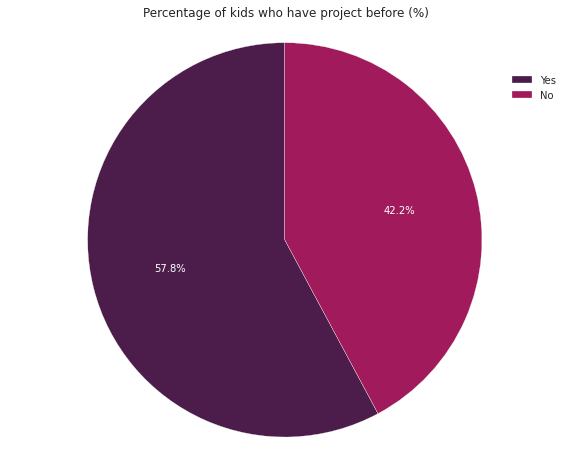

In [ ]:
#Show percentage of kids with completed/didn’t complete projects before (%)

#Create Pie plot
plt.figure(figsize=(10,8))
plt.pie(df['Projects'].value_counts().tolist(), 
        textprops={'color':"w"},   
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')
plt.legend(['Yes','No'], loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.9))
#Add a title
plt.title("Percentage of kids who have project before (%)");


- 

##**Subplots**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


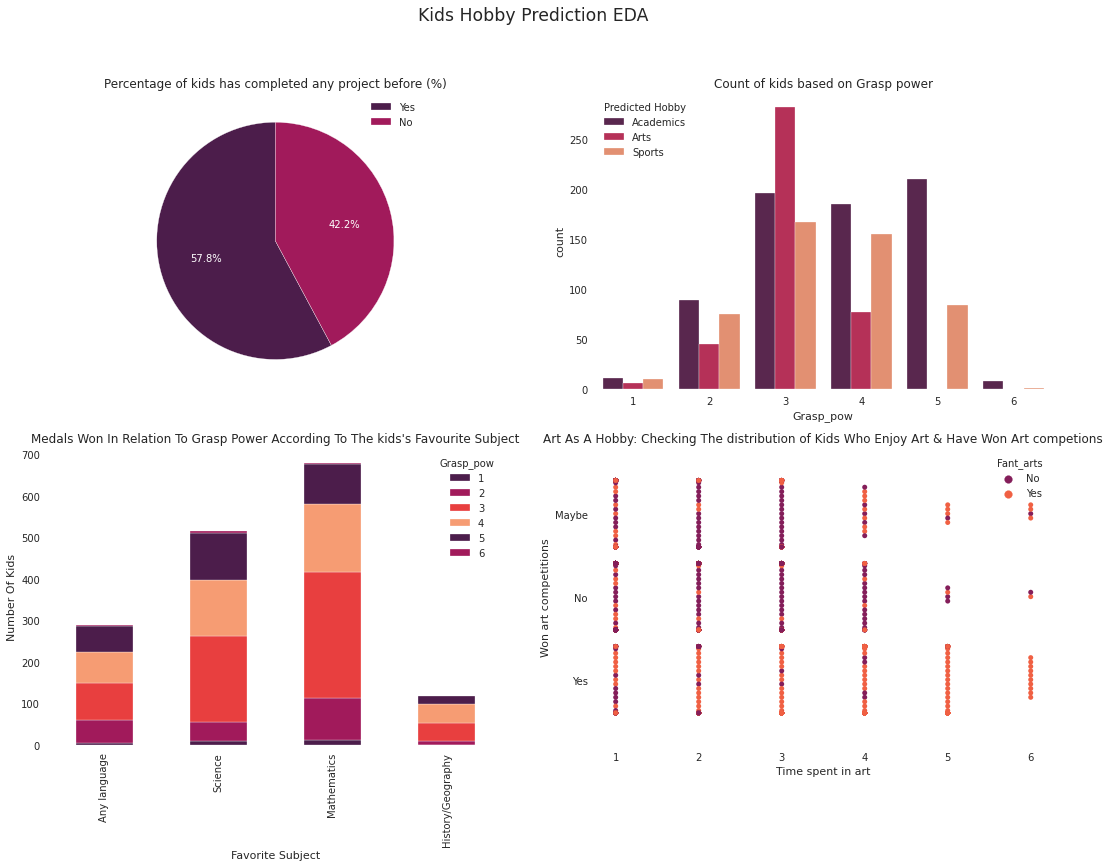

In [ ]:
# create a subplots 
fig, ax = plt.subplots(2,2, figsize=(18,12))
# add title for subplots
fig.suptitle("Kids Hobby Prediction EDA", fontsize="xx-large", y=0.98)
 
 
# Plot 1 
#Show how many Kids has completed/didn’t complete projects before (%)
 
#Create Pie plot
 
ax[0,0].pie(df['Projects'].value_counts().tolist(), 
        textprops={'color':"w"}, 
        autopct='%1.1f%%', startangle=90)
ax[0,0].legend(['Yes','No'], loc='upper right')
axis = plt.axis('equal')
 
#Add a title
ax[0,0].set_title("Percentage of kids has completed any project before (%)");
 
 
 
# Plot 2
# Count of the kids based on the grasp power and the Predicted Hobby
 
# create count plot 
sns.countplot(data = df, x ='Grasp_pow', hue='Predicted Hobby', palette='rocket', ax= ax[0,1])
plt.xlabel("Grasp Power") # add x label 
plt.ylabel("Number of kids") # add y label 
ax[0,1].set_title("Count of kids based on Grasp power"); # add title
 
 
# Plot 3
sns.swarmplot(data = df, x="Time_art", y="Won_arts",hue='Fant_arts', palette='rocket', ax= ax[1,1])
plt.xlabel("Time spent in art") # add x label 
plt.ylabel("Won art competitions") # add y label 
ax[1,1].set_title("Art As A Hobby: Checking The distribution of Kids Who Enjoy Art & Have Won Art competions"); # add title
 
 
# Plot 4
df2 = df.groupby(["Fav_sub","Grasp_pow"])\
.count()["Medals"]\
.unstack("Grasp_pow")\
.reset_index()
 
 
df2["sum"] = df2.iloc[:,1:].apply(lambda x: sum(x), axis=1)
 
df2 = df2.sort_values("sum").set_index("Fav_sub")
 
df2.drop("sum", axis=1).plot(kind="bar", stacked=True, title="Medals Won In Relation To Grasp Power According To The kids's Favourite Subject",xlabel="Favorite Subject",ylabel="Number Of Kids", ax=ax[1,0])
plt.show();

## **Insights**


-	We realized that kids who’s favorite subjects are Science or Mathematics have a medium to high grasp power and are more likely to win sport's medals. Kids who's grasp power is at a medium range are more likely to win medals,therefore showing that if you have good intellectual abilities it doesn't necessarily lessen your physical capabilities.

-	Found out that all the kids who spend a great amount of time in at (between 6 and 5) all have won art competions. Which visually represents that the more time kids spend practicing art the more likely the kids are able to excel in art and win art competitions.

-	Through the dataset we conclude, the kids who have high grasp power are not predicted to be interested in Arts, they are interested in Academics or Sports.In addition, most kids who have a medium grasp power, which is around 3, are interested in Arts.

-	As compare between the kids who wining medals and another desn't win. The kids who regularly play in sports activities are the most winning medals in the sport activities. And the kids who's unregularly in sport activities  unlikely to winning medals. A three hours is the average time medal winning kids spend playing games. 

-	We discovered that the Number of kids who got a scholarship was the lowest as their percentage was 41.72%, where was the percentage of those who did not got a scholarship was 58.28%.

- Out of kids in the dataset we found that 57.8% of them had completed projects under academics before, and 42.2% had not completed any project yet.
